In [1]:
import pandas as pd
import numpy as np
import plotly.express as px
import seaborn as sns
import warnings 
warnings.filterwarnings('ignore')

In [2]:
from statsmodels.tsa.arima_model import ARIMA

In [3]:
from sklearn.metrics import mean_squared_error

In [4]:
new_df = pd.read_csv('C:/Users/luka.radovanovic/Desktop/Discovering new tehnologies/time_series_analyse/working_ds.csv')

In [5]:
new_df = new_df.set_index('Date')

In [6]:
new_df.head()

,first_diff_temp
Date,
1850-01-01,-1.732
1850-02-01,-1.002
1850-03-01,-1.449
1850-04-01,0.031
1850-05-01,1.799


In [7]:
new_df.isna().sum()
new_df.shape

(5084, 1)

In [8]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf


In [9]:

df = new_df

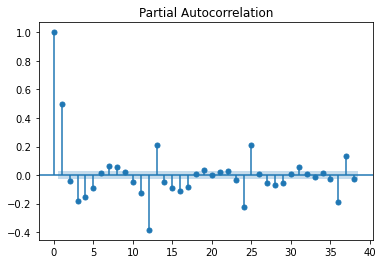

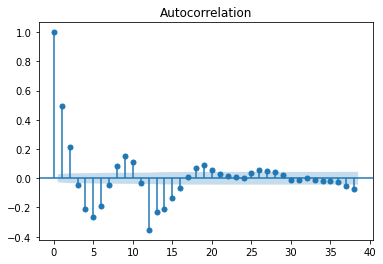

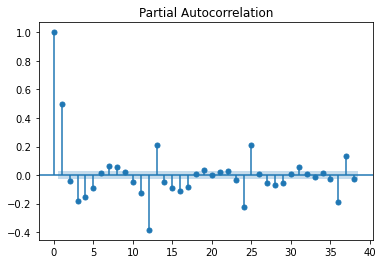

In [10]:
plot_acf(df['first_diff_temp'].dropna())

plot_pacf(df['first_diff_temp'].dropna())

In [11]:
training_data=df[0:4400]
test_data=df[4400:]

In [12]:
df.shape

(5084, 1)

In [13]:
arima=ARIMA(training_data,order=(2,1,3))

C:\Users\luka.radovanovic\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
C:\Users\luka.radovanovic\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:585: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it is not'
C:\Users\luka.radovanovic\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
C:\Users\luka.radovanovic\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:585: ValueWarning: A date index has been provid

In [14]:
model=arima.fit()

C:\Users\luka.radovanovic\Anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [15]:
predictions = model.forecast(steps=len(test_data))[0]

In [16]:
np.sqrt(mean_squared_error(test_data,predictions))

2.271197463731772

In [17]:
p_values = range(0,4)
q_values=range(0,4)
d_values=range(0,3)

In [18]:
import warnings
warnings.filterwarnings("ignore")

In [ ]:
for p in p_values:
    for d in d_values:
        for q in q_values:
            order=(p,d,q)
            train=df[0:4400]
            test=df[4400:]
            predictions=[]
            for i in range(len(test)):
                try:
                    arima=ARIMA(train,order)
                    model = arima.fit(disp=0)
                    pred = model.forecast()[0]
                    predictions.append(pred)
                    error=mean_squared_error(test,predictions)
                    print('MSE is {} with order {}'.format(error,order))
                except:
                    continue

MSE is 5.160609475171086 with order (0, 0, 0)
MSE is 5.444924425591984 with order (0, 0, 1)
MSE is 5.160772309990248 with order (0, 0, 2)
MSE is 5.863084353129636 with order (0, 0, 3)
MSE is 6.798681386555312 with order (0, 1, 0)
MSE is 7.843279067011427 with order (0, 1, 1)
